# Chapter 8: Image Segmentation

Bab ini membahas teknik segmentasi gambar, di mana tujuan utamanya adalah mengklasifikasikan setiap piksel dalam gambar ke dalam kategori tertentu. Ini adalah teknologi di balik fitur seperti penghapusan latar belakang otomatis dan navigasi mobil otonom.

---

## 8.1 Memahami Data Segmentasi
Berbeda dengan klasifikasi yang menghasilkan satu label per gambar, pada segmentasi:
* **Output**: Model mengeluarkan gambar (*mask*) di mana setiap piksel memiliki nilai atau warna yang mewakili kelas objeknya.
* **Tujuan**: Membagi gambar menjadi bagian-bagian yang jelas secara spasial (misal: memisahkan piksel "jalan", "langit", dan "kendaraan").



---

## 8.2 Definisi Pipeline TensorFlow (tf.data)
Pipeline data untuk segmentasi lebih kompleks karena transformasi harus diterapkan secara konsisten baik pada gambar input maupun gambar target (*mask*).
* **Preprocessing**: Mengubah ukuran gambar menggunakan **Bilinear Interpolation** untuk input (agar halus) dan **Nearest Neighbor Interpolation** untuk target (agar label piksel tetap berupa angka bulat/diskrit).
* **Augmentasi**: Teknik seperti rotasi atau flip harus dilakukan secara sinkron pada gambar dan mask agar posisinya tetap akurat.

---

## 8.3 Optimasi Pipeline dengan Caching
Untuk dataset besar, kita menggunakan metode `.cache()` pada `tf.data.Dataset`.
* **Mekanisme**: Data yang sudah diproses disimpan di memori (RAM) setelah epoch pertama.
* **Keuntungan**: Pada epoch berikutnya, pipeline tidak perlu mengulang proses pembacaan file dan prapemrosesan, sehingga kecepatan training meningkat drastis.

---

## 8.4 Arsitektur DeepLab v3
DeepLab v3 adalah salah satu model segmentasi paling kuat yang dikembangkan oleh Google.
* **Backbone**: Biasanya menggunakan model **ResNet-50** yang sudah dilatih sebelumnya.
* **Atrous Convolution**: Teknik konvolusi dengan "lubang" (celah) untuk memperluas bidang pandang (*receptive field*) tanpa menambah jumlah parameter. Besarnya celah dikontrol oleh **Dilation Rate**.



---

## 8.5 Modul ASPP (Atrous Spatial Pyramid Pooling)
ASPP adalah komponen kunci DeepLab v3 yang menangkap objek pada berbagai skala.
* **Mekanisme**: Menjalankan beberapa konvolusi atrous dengan *dilation rate* yang berbeda secara paralel.
* **Global Average Pooling**: Menggabungkan informasi ringkas dari seluruh gambar untuk memberikan konteks global.

---

## 8.6 Loss Functions & Metrik Evaluasi

### 1. Loss Functions
* **Cross-Entropy Loss**: Menghitung selisih antara probabilitas prediksi piksel dengan label asli.
* **Dice Loss**: Fokus pada tumpang tindih (*overlap*) antara prediksi dan target. Sangat efektif untuk menangani dataset yang tidak seimbang (misal: objek kecil di latar belakang luas).

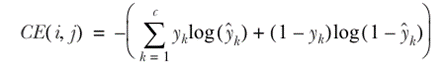
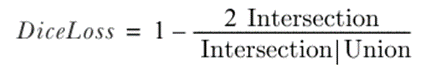

### 2. Metrik Evaluasi
* **Pixel Accuracy**: Menghitung berapa persen piksel yang diklasifikasikan dengan benar.
* **Mean IoU (Intersection over Union)**: Metrik standar segmentasi yang menghitung rasio persimpangan antara area prediksi dan area asli dibagi dengan total gabungan keduanya.

---

## 8.7 Melatih dan Evaluasi Model
Implementasi di Keras melibatkan penggabungan model backbone (ResNet) dengan kepala segmentasi (ASPP + Decoder).
* **Eksekusi**: Menggunakan `deeplabv3.fit()` untuk pelatihan dan `deeplabv3.evaluate()` untuk menguji performa model pada data validasi.
* **Visualisasi**: Seringkali dilakukan dengan menampilkan gambar asli, mask asli, dan mask prediksi berdampingan untuk melihat akurasi pemotongan tepi objek.

---

## 8.8 Tip Implementasi di Colab
Gunakan fungsi `tf.image.resize` dengan hati-hati untuk data target:

```python
# Resize input gambar
image = tf.image.resize(image, [256, 256], method='bilinear')

# Resize mask (target) - HARUS menggunakan nearest agar label tidak berubah jadi float
mask = tf.image.resize(mask, [256, 256], method='nearest')